<a href="https://colab.research.google.com/github/Felipe34515/Trabajos-BI/blob/main/Proyecto_Anal%C3%ADtica_de_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Analítica de textos**

## Integrantes:
- Felipe Rueda - 202010903
- Santiago Pardo - 202013025
- Luis Plazas - 202013155

## Contexto:

El Ministerio de Comercio, Industria y Turismo de Colombia, la Asociación Hotelera y
Turística de Colombia – COTELCO, cadenas hoteleras de la talla de Hilton, Hoteles Estelar,
Holiday Inn y hoteles pequeños ubicados en diferentes municipios de Colombia están
interesados en analizar las características de sitios turísticos que los hacen atractivos para
turistas locales o de otros países, ya sea para ir a conocerlos o recomendarlos. De igual
manera, quieren comparar las características de dichos sitios, con aquellos que han
obtenido bajas recomendaciones y que están afectando el número de turistas que llegan a
ellos. Adicionalmente, quieren tener un mecanismo para determinar la calificación que
tendrá un sitio por parte de los turistas y así, por ejemplo, aplicar estrategias para identificar
oportunidades de mejora que permitan aumentar la popularidad de los sitios y fomentar el
turismo.

Esos actores de turismo prepararon dos conjuntos de datos con reseñas de sitios turísticos.
Cada reseña tiene una calificación según el sentimiento que tuvo el turista al visitarlo. Estos
actores quieren lograr un análisis independiente de los conjuntos de datos y al final del
proyecto discutir sobre los grupos de científicos de datos e ingenieros de datos que
acompañarán el desarrollo real de este proyecto.






In [ ]:
# @title Librerías a utilizar

import pandas as pd
import matplotlib.pyplot as plt
import joblib
from joblib import dump, load
import numpy as np

import spacy
import nltk
from nltk.corpus import stopwords
import torch
import torchtext
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [ ]:
# @title Instalar dependencias (Solo instalar una vez)

# !pip install spacy
# !python -m spacy download es_core_news_sm
# !pip install nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [ ]:
# @title Carga de datos
df = pd.read_csv("tipo1_entrenamiento_estudiantes.csv", delimiter=",")
df

,Review,Class
0,Nos alojamos en una casa alquilada en la ciuda...,4
1,"La comida está bien, pero nada especial. Yo te...",3
2,"En mi opinión, no es una como muchos usuarios ...",3
3,esta curiosa forma que asemeja una silla de mo...,4
4,Lo mejor era la limonada. Me gusto la comida d...,2
...,...,...
7870,El motivo de mi estancia fue porque vine a un ...,3
7871,Es difícil revisar el castillo porque apenas p...,3
7872,Si vas a Mérida no puedes perderte de este lug...,5
7873,"Este imperdible sitio, que lleva el nombre del...",5


# **1. Entendimiento del negocio y enfoque analítico. (10%)**

Basado en la descripción que proporcionaste, aquí están los posibles objetivos del proyecto, criterios de éxito y el enfoque analítico:

## **Objetivos del proyecto**:
1. Analizar las características de los sitios turísticos que los hacen atractivos para los turistas locales y extranjeros.
2. Comparar las características de los sitios turísticos populares con aquellos que han obtenido bajas recomendaciones.
3. Desarrollar un mecanismo para predecir la calificación que un sitio recibirá de los turistas.
4. Identificar oportunidades de mejora para aumentar la popularidad de los sitios y fomentar el turismo.

## **Criterios de éxito**:
1. Identificación precisa de las características que hacen atractivos a los sitios turísticos.
2. Precisión en la comparación de sitios turísticos populares y menos populares.
3. Precisión en la predicción de las calificaciones de los sitios turísticos.
4. Identificación efectiva de oportunidades de mejora para los sitios turísticos.

## **Enfoque analítico**:
1. Análisis descriptivo de los datos para entender las características de los sitios turísticos.
2. Análisis comparativo para identificar las diferencias entre los sitios turísticos populares y menos populares.
3. Modelado predictivo (como la regresión, las máquinas de vectores de soporte o las redes neuronales) para predecir las calificaciones de los sitios turísticos.
4. Análisis de las oportunidades de mejora utilizando técnicas como el análisis de causa raíz o el análisis FODA (Fortalezas, Oportunidades, Debilidades, Amenazas).

## Integrantes del grupos de la clase de estadistica:
- Isabella Nova
- Ana Sanchez


| Título | Descripción |
|-----------|-----------|
| Oportunidad/problema Negocio  | Valor 2   |
| Enfoque analítico (Descripción del requerimiento desde el punto de vista de aprendizaje automático) e incluya las técnicas y algoritmos que propone utilizar.  | Valor 5   |
| Organización y rol dentro de ella que se beneficia con la oportunidad definida   | Valor 5   |
| Contacto con experto externo al proyecto y detalles de la planeación | Valor 5   |




# **2. Entendimiento y preparación de los datos. (20%)**

## **2.1 Análisis de los datos**

- Conplejitud: Podemos ver que mo hay filas vacias

In [ ]:
df.isnull().sum()

Review    0
Class     0
dtype: int64

- Unicidad : Podemos ver que hay 71 datos repetidos

In [ ]:
df.shape

(7875, 2)

In [ ]:
df['Review'].nunique()

7804

- Nulos: No hay datos nulos
- Validez: Todos los datos son validos

## **2.2 Limpieza de datos**

In [ ]:
# @title Quitar datos duplicados
df = df.drop_duplicates()
df.shape

(7804, 2)

In [ ]:
# @title Quitar números, signos de puntuación y mayusculas
df = df.replace(r'\d', '', regex=True)  # Eliminar números
df = df.replace(r'[^\w\s]', '', regex=True)  # Eliminar signos de puntuación
df['Review'] = df['Review'].str.lower()  # Convertir todas las letras a minúsculas

### Quitar las Stop Words

Las "stop words" en un modelo de procesamiento de lenguaje natural (NLP, por sus siglas en inglés) son palabras que se filtran antes o después del procesamiento del texto. Cuando construimos el vocabulario de un modelo, las "stop words" son las palabras que excluimos. Generalmente, estas palabras son muy comunes en el lenguaje (como "en", "y", "a", "el", "la", etc. en español) y no contienen información importante para entender el contexto de un texto. Por lo tanto, se eliminan para reducir la cantidad de ruido en los datos y mejorar la eficiencia del modelo. Sin embargo, en algunos casos, como en el análisis de sentimientos, las "stop words" pueden ser útiles y se mantienen.

In [ ]:
# @title Eliminación de las Stop Words
nltk.download("stopwords")
stop_words = set(stopwords.words("spanish"))
df["Review_Normalizado"] = df["Review"].apply(lambda row: " ".join([word for word in row.split() if word.lower() not in stop_words]))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Class,Review_Normalizado
0,nos alojamos en una casa alquilada en la ciuda...,4,alojamos casa alquilada ciudad amurallada pare...
1,la comida está bien pero nada especial yo tení...,3,comida bien especial mejor comida mexcan unido...
2,en mi opinión no es una como muchos usuarios r...,3,opinión usuarios reclaman gran paladar parece ...
3,esta curiosa forma que asemeja una silla de mo...,4,curiosa forma asemeja silla montar ahi nombre ...
4,lo mejor era la limonada me gusto la comida de...,2,mejor limonada gusto comida mundo sosa frío
...,...,...,...
7870,el motivo de mi estancia fue porque vine a un ...,3,motivo estancia vine congreso medico hospedaro...
7871,es difícil revisar el castillo porque apenas p...,3,difícil revisar castillo apenas podíamos camin...
7872,si vas a mérida no puedes perderte de este lug...,5,si vas mérida puedes perderte lugar nueva sucu...
7873,este imperdible sitio que lleva el nombre del ...,5,imperdible sitio lleva nombre conquistador joy...


### Lematización

La lematización es un proceso en el procesamiento del lenguaje natural que consiste en reducir las palabras a su forma base o raíz, conocida como "lema". Por ejemplo, las palabras "corriendo", "corrió" y "correrá" se lematizan a "correr".

La lematización ayuda a reducir la dimensionalidad de los datos de texto y a agrupar palabras similares, lo que puede mejorar la eficacia de muchos algoritmos de NLP.

In [ ]:
# @title Iniciar Lematización

# Cargar el modelo de spaCy en español
nlp = spacy.load('es_core_news_sm')

# Función para lematizar una oración
def lemmatize_sentence(sentence):
    doc = nlp(sentence)
    lemmatized_sentence = " ".join([token.lemma_ for token in doc ])
    return lemmatized_sentence

# Aplicar la función de lematización a la columna 'Review'
df['Review_Normalizado'] = df['Review_Normalizado'].apply(lambda x: lemmatize_sentence(x))
df

,Review,Class,Review_Normalizado
0,nos alojamos en una casa alquilada en la ciuda...,4,alojamo casa alquilado ciudad amurallado parec...
1,la comida está bien pero nada especial yo tení...,3,comida bien especial mejor comida mexcir unido...
2,en mi opinión no es una como muchos usuarios r...,3,opinión usuario reclamar gran paladar parecer ...
3,esta curiosa forma que asemeja una silla de mo...,4,curioso forma asemejo silla montar ahi nombre ...
4,lo mejor era la limonada me gusto la comida de...,2,mejor limonado gusto comida mundo sós frío
...,...,...,...
7870,el motivo de mi estancia fue porque vine a un ...,3,motivo estancia venir congreso medico hospedar...
7871,es difícil revisar el castillo porque apenas p...,3,difícil revisar castillo apenas poder caminar ...
7872,si vas a mérida no puedes perderte de este lug...,5,si ir mérido poder perderte lugar nuevo sucurs...
7873,este imperdible sitio que lleva el nombre del ...,5,imperdible sitio llevar nombre conquistador jo...


### Tokenización

La tokenización es el proceso de sustituir los datos sensibles por símbolos de identificación únicos que conservan toda la información esencial de los datos sin comprometer la seguridad.

In [ ]:
# Función para tokenizar una oración
def tokenize_sentence(sentence):
    return nltk.word_tokenize(sentence)

# Aplicar la función de tokenización a la columna 'Review'
df['Review_Normalizado'] = df['Review_Normalizado'].apply(lambda x: tokenize_sentence(x))
df

,Review,Class,Review_Normalizado
0,nos alojamos en una casa alquilada en la ciuda...,4,"[alojamo, casa, alquilado, ciudad, amurallado,..."
1,la comida está bien pero nada especial yo tení...,3,"[comida, bien, especial, mejor, comida, mexcir..."
2,en mi opinión no es una como muchos usuarios r...,3,"[opinión, usuario, reclamar, gran, paladar, pa..."
3,esta curiosa forma que asemeja una silla de mo...,4,"[curioso, forma, asemejo, silla, montar, ahi, ..."
4,lo mejor era la limonada me gusto la comida de...,2,"[mejor, limonado, gusto, comida, mundo, sós, f..."
...,...,...,...
7870,el motivo de mi estancia fue porque vine a un ...,3,"[motivo, estancia, venir, congreso, medico, ho..."
7871,es difícil revisar el castillo porque apenas p...,3,"[difícil, revisar, castillo, apenas, poder, ca..."
7872,si vas a mérida no puedes perderte de este lug...,5,"[si, ir, mérido, poder, perderte, lugar, nuevo..."
7873,este imperdible sitio que lleva el nombre del ...,5,"[imperdible, sitio, llevar, nombre, conquistad..."


Después de norrmalizar los datos, podemos ver las 20 palabras más usadas.

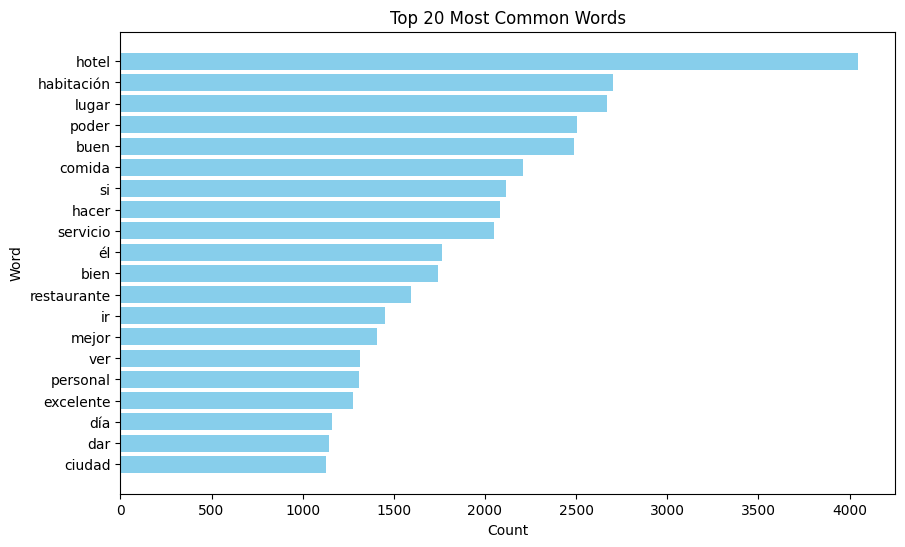

In [ ]:
# Dividir la cadena en palabras individuales
All_words = [word for sublist in df['Review_Normalizado'] for word in sublist]

# Contar la frecuencia de cada palabra
word_counts = Counter(All_words)

# Obtener las 10 palabras más comunes
most_common_words = word_counts.most_common(20)

# Crear un DataFrame a partir de las palabras más comunes
word_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Crear un gráfico de barras de las palabras más comunes
plt.figure(figsize=(10, 6))
plt.barh(word_df['word'], word_df['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis()
plt.show()


# **3. Modelado y evaluación. (20%)**

## 3.1 Primer Modelo implementado - Naive Bayes (Felipe Rueda)

El modelo Naive Bayes es fácil de construir, muy rápido y adecuado para conjuntos de datos muy grandes. A pesar de su simplicidad, a menudo funciona sorprendentemente bien y se utiliza ampliamente porque a menudo supera a métodos de clasificación más sofisticados.

En el análisis de texto, el modelo Naive Bayes se utiliza a menudo para la clasificación de spam, el análisis de sentimientos y la categorización de documentos. En estos casos, las “características” son generalmente las palabras o n-gramas del documento a clasificar.

In [ ]:
# @title separacion de variable predictoria y los textos a utilizar
df['Review_Normalizado'] = df['Review_Normalizado'].apply(lambda x: ' '.join(map(str, x)))
df

,Review,Class,Review_Normalizado
0,nos alojamos en una casa alquilada en la ciuda...,4,alojamo casa alquilado ciudad amurallado parec...
1,la comida está bien pero nada especial yo tení...,3,comida bien especial mejor comida mexcir unido...
2,en mi opinión no es una como muchos usuarios r...,3,opinión usuario reclamar gran paladar parecer ...
3,esta curiosa forma que asemeja una silla de mo...,4,curioso forma asemejo silla montar ahi nombre ...
4,lo mejor era la limonada me gusto la comida de...,2,mejor limonado gusto comida mundo sós frío
...,...,...,...
7870,el motivo de mi estancia fue porque vine a un ...,3,motivo estancia venir congreso medico hospedar...
7871,es difícil revisar el castillo porque apenas p...,3,difícil revisar castillo apenas poder caminar ...
7872,si vas a mérida no puedes perderte de este lug...,5,si ir mérido poder perderte lugar nuevo sucurs...
7873,este imperdible sitio que lleva el nombre del ...,5,imperdible sitio llevar nombre conquistador jo...


In [ ]:
X_data, y_data = df['Review_Normalizado'],df['Class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# @title Generar modelo
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
accuracy = model.score(X_test_vec, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.4727738629083921


In [ ]:
model_2 = GaussianNB()

In [ ]:
model_2.fit(X_train_vec.toarray(), y_train)

GaussianNB()

In [ ]:
accuracy = model_2.score(X_test_vec.toarray(), y_test)
print("Accuracy:", accuracy)

Accuracy: 0.2645739910313901


## 3.2 Segundo Modelo implementado

## 3.3 Tercer Modelo implementado

# **4. Resultados. (20%)**

# **5. Mapa de actores relacionado con el producto de datos creado. (10%)**

# **6.Trabajo en equipo (8%)**

In [1]:
!pip install ydata-profiling
!pip install contractions
import nltk
nltk.download('all')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=80dc968a37fbee0ed1bd5cf281c6d1574312075b309a0fd379d39c0c7293f1cc
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [85]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score



In [3]:
df = pd.read_csv('tipo1_entrenamiento_estudiantes.csv')

In [47]:
train,test = train_test_split(df, train_size=0.8,random_state=42)

In [5]:
ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
def show_graph(words, stopwords):
  comment_words = ''

  for val in words:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
  wordcloud = WordCloud(width=800,height = 800,
                        background_color='white',
                        stopwords=stopwords,
                        min_font_size=10).generate(comment_words)

  plt.figure(figsize=(6,15),facecolor=None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad=0)

  plt.show()

Words for Class : 3


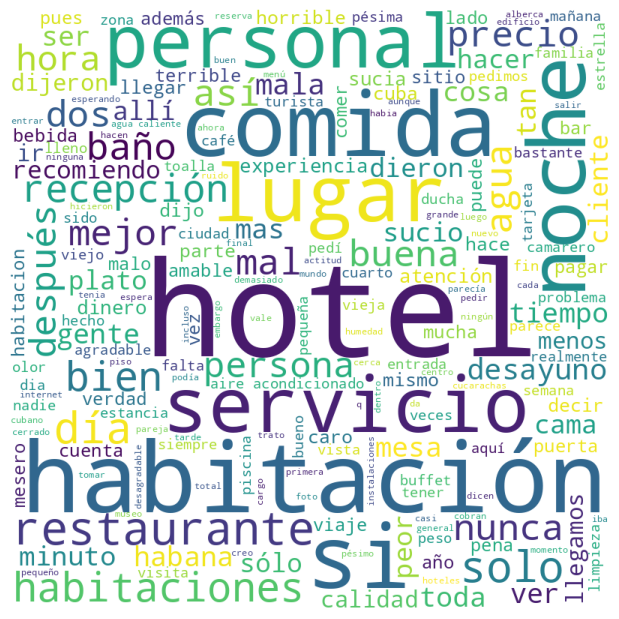

Words for Class : 5


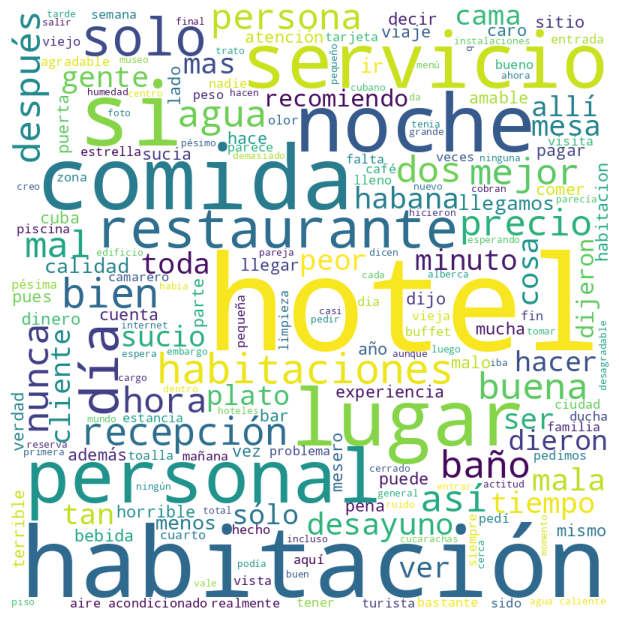

Words for Class : 1


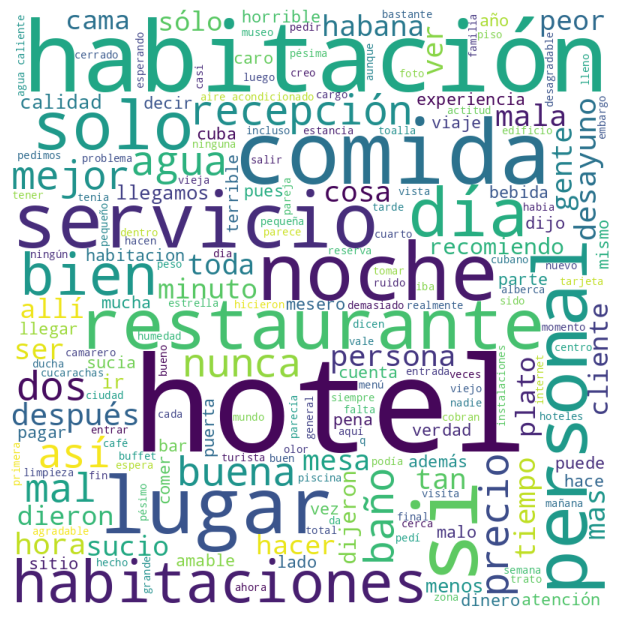

Words for Class : 4


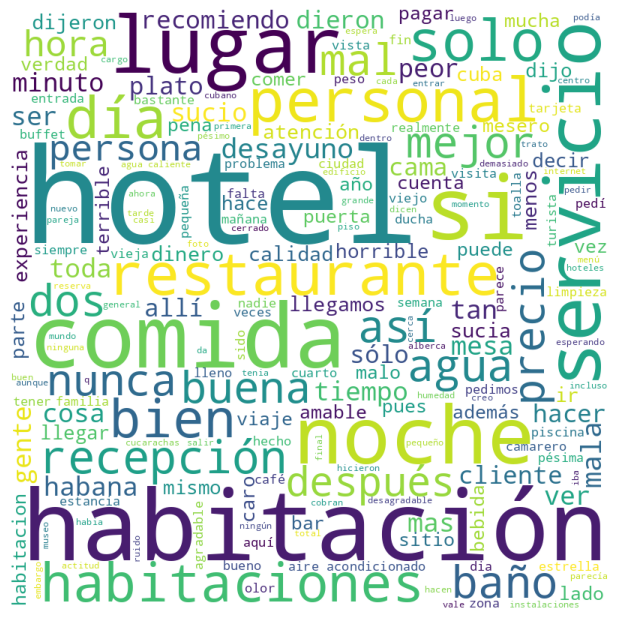

Words for Class : 2


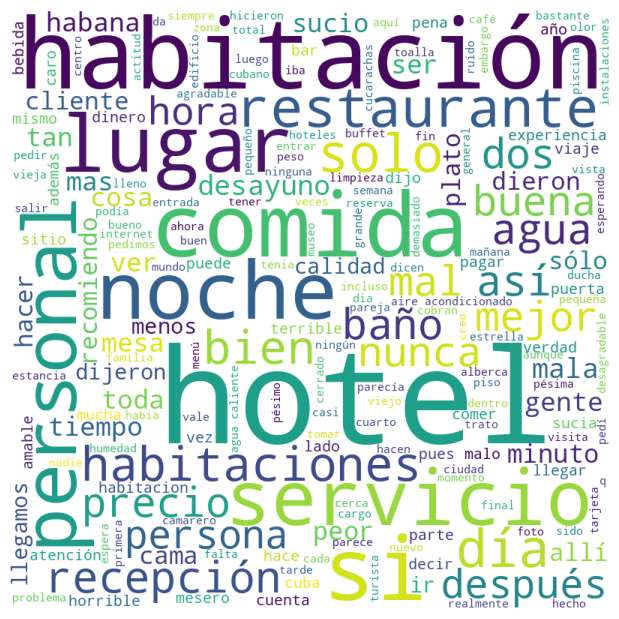

In [49]:
stop_words = stopwords.words('spanish')
for i in train['Class'].unique():
  print(f'Words for Class : {i}')
  show_graph(train.loc[train['Class']==1,'Review'],stopwords = stop_words)

Preparación

In [80]:
x_train = train['Review']
y_train = train['Class']
x_test = test['Review']
y_test = test['Class']

In [51]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words, stopwords=stopwords.words('spanish')):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    #words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

Tokenización

In [52]:
x_train_n = x_train.apply(word_tokenize)
x_train_n = x_train_n.apply(preprocessing)

Normalización

In [53]:
def stem_words(words):
  stemmer = SnowballStemmer('spanish')
  stems = []
  for word in words:
    stem = stemmer.stem(word)
    stems.append(stem)
  return stems

def lemmatize_verbs(words):
  lemmatizer = WordNetLemmatizer()
  lemmas = []
  for word in words:
    lemma = lemmatizer.lemmatize(word,pos='v')
    lemmas.append(lemma)
  return lemmas

def stem_and_lemmatize(words):
  words = stem_words(words)
  words = lemmatize_verbs(words)
  return words

In [54]:
x_train_n = x_train_n.apply(stem_and_lemmatize)

In [55]:
x_train_n.head()

7756    [deb, actualiz, horari, diferent, pagin, cualq...
196     [sed, segund, parqu, laurel, excelent, atencio...
4471    [descubri, client, habi, reserv, nh, hotel, pr...
6783    [increibl, experient, habi, esper, seri, ubic,...
415     [parqu, precios, catedral, letrer, mer, wifi, ...
Name: Review, dtype: object

In [56]:
train['Transformed'] = x_train_n.apply(lambda x: ' '.join(map(str,x)))

In [57]:
train

,Review,Class,Transformed
7756,Deben de actualizar los horarios en las difere...,3,deb actualiz horari diferent pagin cualqu visi...
196,Sede segundo parque de Laureles!!!\nExcelente ...,5,sed segund parqu laurel excelent atencion mejo...
4471,Cuando descubrí que nuestro cliente nos había ...,3,descubri client habi reserv nh hotel primer pa...
6783,Esto no fue la increíble experiencia que había...,1,increibl experient habi esper seri ubic anunci...
415,"El parque es precioso, tiene catedral, el letr...",4,parqu precios catedral letrer mer wifi lug sen...
...,...,...,...
5226,En su momento el malecón de La Habana debió de...,4,moment malecon haban debi ser especial rest mu...
5390,"Lo mejor, sin duda, la música en directo. Me g...",2,mejor dud music direct gust grup musical rest ...
860,"Sin más. Si sobra tiempo, pues es una visita ...",3,mas si sobr tiemp pues visit disfrut vist sub ...
7603,"El lugar es agradable y el servicio bueno, la ...",5,lug agrad servici buen com fusion siti simplem...


In [58]:
dummy = CountVectorizer(binary=True)
x_dummy = dummy.fit_transform(train['Transformed'])

In [62]:
x_dummy.shape

(6300, 13193)

In [63]:
tf_idf = TfidfVectorizer()
x_tf_idf = tf_idf.fit_transform(train['Transformed'])

In [64]:
x_tf_idf.shape

(6300, 13193)

Para automatizar y probar en el pipeline

In [76]:
class TextPreprocessing(BaseEstimator,TransformerMixin):
    def __init__(self,stopwords=stopwords.words('spanish')):
        self.stopwords = stopwords

    def remove_non_ascii(self, words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    def to_lowercase(self, words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    def remove_punctuation(self, words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    def replace_numbers(self, words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def remove_stopwords(self, words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in self.stopwords:
                new_words.append(word)
        return new_words

    def stem_words(self, words):
        """Stem words in list of tokenized words"""
        stemmer = SnowballStemmer('spanish')
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems

    def lemmatize_verbs(self, words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas

    def stem_and_lemmatize(self, words):
        words = self.stem_words(words)
        words = self.lemmatize_verbs(words)
        return words

    def preproccesing(self, words):
        words = self.to_lowercase(words)
        words = self.replace_numbers(words)
        words = self.remove_punctuation(words)
        words = self.remove_non_ascii(words)
        words = self.remove_stopwords(words)
        return words

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        new_X_train = pd.Series(X)
        new_X_train = new_X_train.apply(contractions.fix)
        new_X_train = new_X_train.apply(word_tokenize)
        new_X_train = new_X_train.apply(lambda x: self.preproccesing(x))
        new_X_train = new_X_train.apply(lambda x: self.stem_and_lemmatize(x))
        new_X_train = new_X_train.apply(lambda x: ' '.join(map(str, x)))
        return new_X_train

In [90]:

estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('classifier', SVC(kernel='rbf', probability=True))
    ]

In [91]:
pip = Pipeline(estimators)
pip.fit(x_train,y_train)

Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', CountVectorizer(lowercase=False)),
                ('classifier', SVC(probability=True))])

In [92]:
pred_svm = pip.predict(x_test)

In [94]:
print(accuracy_score(pred_svm,y_test))

0.48
